## Converts latent vectors to music chords

Input: stellar spectra, complete library (MILES)

Output: spectra chords and durations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from math import log2, pow

In [2]:
custom_set = np.load('Miles_all_spectra.npy')

In [3]:
encoded_imgs = np.load('DeepVAE2_encoded_imgs_all.npy')

In [4]:
encoded_imgs

array([[-0.25427413, -0.11451887, -0.11983433, -0.0034035 ],
       [-0.24646705, -0.14042006, -0.05658504,  0.02071462],
       [ 0.13919373,  0.14810945,  0.26140374, -0.2918687 ],
       ...,
       [-0.17028642, -0.05749464, -0.01852241,  0.09220476],
       [-0.01362864,  0.08471317, -0.01200876,  0.15116332],
       [ 0.09687857, -0.19342092,  0.4388171 , -0.3329321 ]],
      dtype=float32)

In [5]:
decoded_imgs = np.load('DeepVAE2_decoded_imgs_all.npy')

In [6]:
decoded_imgs

array([[5.4935558e-04, 5.4950122e-04, 5.2316772e-04, ..., 5.5976055e-04,
        5.6366518e-04, 5.4034108e-04],
       [1.7397908e-03, 1.7392070e-03, 1.6907323e-03, ..., 1.8242024e-03,
        1.8247267e-03, 1.7320194e-03],
       [7.4922224e-04, 7.3268067e-04, 7.8272208e-04, ..., 2.5852963e-03,
        2.5285629e-03, 1.0335483e-03],
       ...,
       [2.7173245e-03, 2.7087478e-03, 2.6524088e-03, ..., 3.3159666e-03,
        3.3166225e-03, 2.8242064e-03],
       [3.1573316e-03, 3.1741625e-03, 3.1894273e-03, ..., 3.5508568e-03,
        3.5104488e-03, 3.3634766e-03],
       [2.4567904e-05, 2.3994982e-05, 2.6311935e-05, ..., 4.6676034e-03,
        4.1121761e-03, 9.4742092e-05]], dtype=float32)

In [7]:
x_axis = np.load('x_axis.npy') #only used to check the spectra

In [8]:
dim = len(encoded_imgs)

Text(0.5, 0, 'Decoded Spectra')

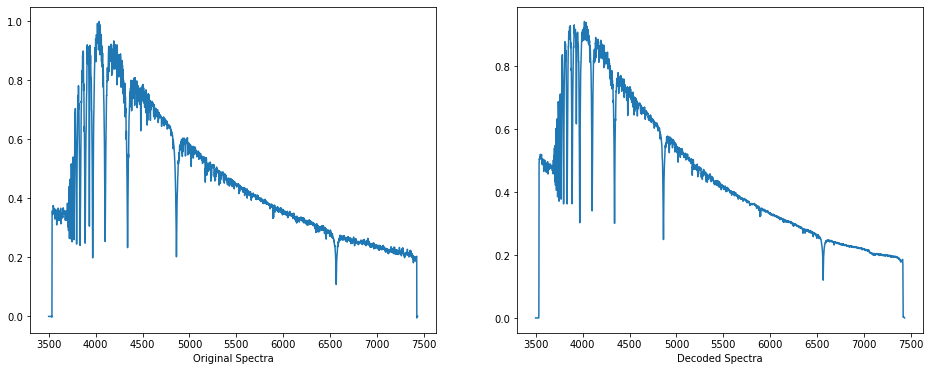

In [9]:
figure = 154
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].plot(x_axis, custom_set[figure])
ax[0].set_xlabel('Original Spectra')   
ax[1].plot(x_axis, decoded_imgs[figure])
ax[1].set_xlabel('Decoded Spectra')

In [10]:
encoded_imgs[0][1]

-0.114518866

In [11]:
min = np.min(encoded_imgs)
min

-0.5179664

In [12]:
adjusted_imgs = 1000*np.add(encoded_imgs,0.6)#adjusts values to piano range: 27.5 Hz (A0) to 4186 Hz (C8)

In [13]:
adjusted_imgs

array([[ 345.7259 ,  485.48114,  480.16568,  596.59656],
       [ 353.53296,  459.57996,  543.41504,  620.71466],
       [ 739.1937 ,  748.10944,  861.40375,  308.13135],
       ...,
       [ 429.7136 ,  542.5054 ,  581.47766,  692.2048 ],
       [ 586.37134,  684.7132 ,  587.9912 ,  751.1634 ],
       [ 696.8786 ,  406.5791 , 1038.8171 ,  267.0679 ]], dtype=float32)

In [14]:
max = np.max(adjusted_imgs)
max

1107.9886

In [15]:
min = np.min(adjusted_imgs)
min

82.03363

## Calculating notes

In [16]:
A4 = 440
C0 = A4*pow(2, -4.75)
name = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]
    
def pitch(f):
    h = round(12*log2(f/C0))
    octave = h // 12
    n = h % 12
    return name[n] + str(octave)

In [17]:
pitch(82.03363)

'E2'

In [18]:
pitch(1107.9886)

'C#6'

In [19]:
encoded_notes = (np.ones((dim, 4), dtype=float)).astype(str)

In [20]:
encoded_notes[0][0]

'1.0'

In [21]:
for i in range(dim):
    for j in range(4):
        encoded_notes[i][j] = pitch(adjusted_imgs[i][j])

In [22]:
np.save('encoded_notes', encoded_notes)

## Durations

In [23]:
dur_notes = np.load('spectra_durations.npy')

In [24]:
dur_notes

array([ 4,  3,  6,  3,  0,  3,  9,  4,  5,  2,  1,  6,  4,  5,  5,  2,  1,
        5,  6,  3,  3,  3,  0,  2,  8,  4,  4,  8,  2,  8,  4,  2,  1,  3,
        3,  3,  3,  3,  3,  5,  2,  5,  1,  3,  3,  4,  6,  0,  3,  5,  6,
        5,  3,  6,  2,  5,  3,  4,  2,  2,  6,  4,  3,  7,  1,  4,  4,  5,
        5,  3,  3,  2,  4,  1,  1,  5,  3,  4,  5,  5,  3,  0,  3,  9,  0,
        5,  5,  8,  3,  2,  5,  2,  3,  4, 10,  4,  1,  2,  2,  1,  9,  2,
        3,  6,  4,  2,  4,  9,  4,  4,  2,  6,  4,  3,  4,  4,  1,  4,  4,
        4,  4,  5,  3,  5,  0,  0,  4,  0,  3,  4,  1,  3,  2,  6,  2,  3,
        3,  6,  8,  0,  3,  4,  6,  2,  2,  2,  4,  2,  2,  0,  6,  7, 13,
        3,  4,  4,  8,  3, 10,  0,  4,  7,  2,  1,  3,  5,  9,  7,  4,  2,
        2,  3,  6,  3,  1,  6,  3,  2,  2,  9,  5,  1,  2,  3,  2,  3,  1,
        6,  3,  5,  4,  6,  3,  3,  4,  1, 10,  4,  3,  2,  3,  2,  4,  3,
        6,  2,  2,  3,  1,  1,  4,  4,  4,  6,  1,  2,  3,  3,  5,  2,  3,
        4,  2,  8,  0,  8

In [25]:
print(np.min(dur_notes))
print(np.max(dur_notes))

0
13


In [26]:
from music21 import *

In [27]:
chords = [[] for _ in encoded_notes]
for i in range(dim):
    for j in range(4):
        chords[i].append(encoded_notes[i][j])

In [28]:
#freqs = np.zeros ((curves, 1))
s = stream.Stream()
n = 120
s.append(tempo.MetronomeMark(number=n))

durations = ["whole","half", "quarter", "eighth"]#, "16th"]#, "32nd", "64th"]
for i in range(dim):
    if dur_notes[i] >= 12:
        figure = durations[0]
    if (dur_notes[i] >= 8) and (dur_notes[i] < 12):
        figure = durations[1]
    if (dur_notes[i] > 4) and (dur_notes[i] <= 8):
        figure = durations[2]
    if dur_notes[i] <= (4):
        figure = durations[3]
    
    exec(f'n{i} = chord.Chord(chords[i])')
    exec(f'n{i}.duration.type = figure')
    

dlopen error : dlopen(libjack.0.dylib, 1): image not found 
dlopen error : dlopen(/usr/local/lib/libjack.0.dylib, 1): image not found 
Creating main window…
ZoomBox::setLogicalZoom(): Formatting logical zoom level as 100% (rounded from 1.000000)
Reading translations…
convert </var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/music21/tmpdv9lj20y.xml>...
JIT is disabled for QML. Property bindings and animations will be very slow. Visit https://wiki.qt.io/V4 to learn about possible solutions for your platform.
	to </var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/music21/tmpdv9lj20y.png>
... success!


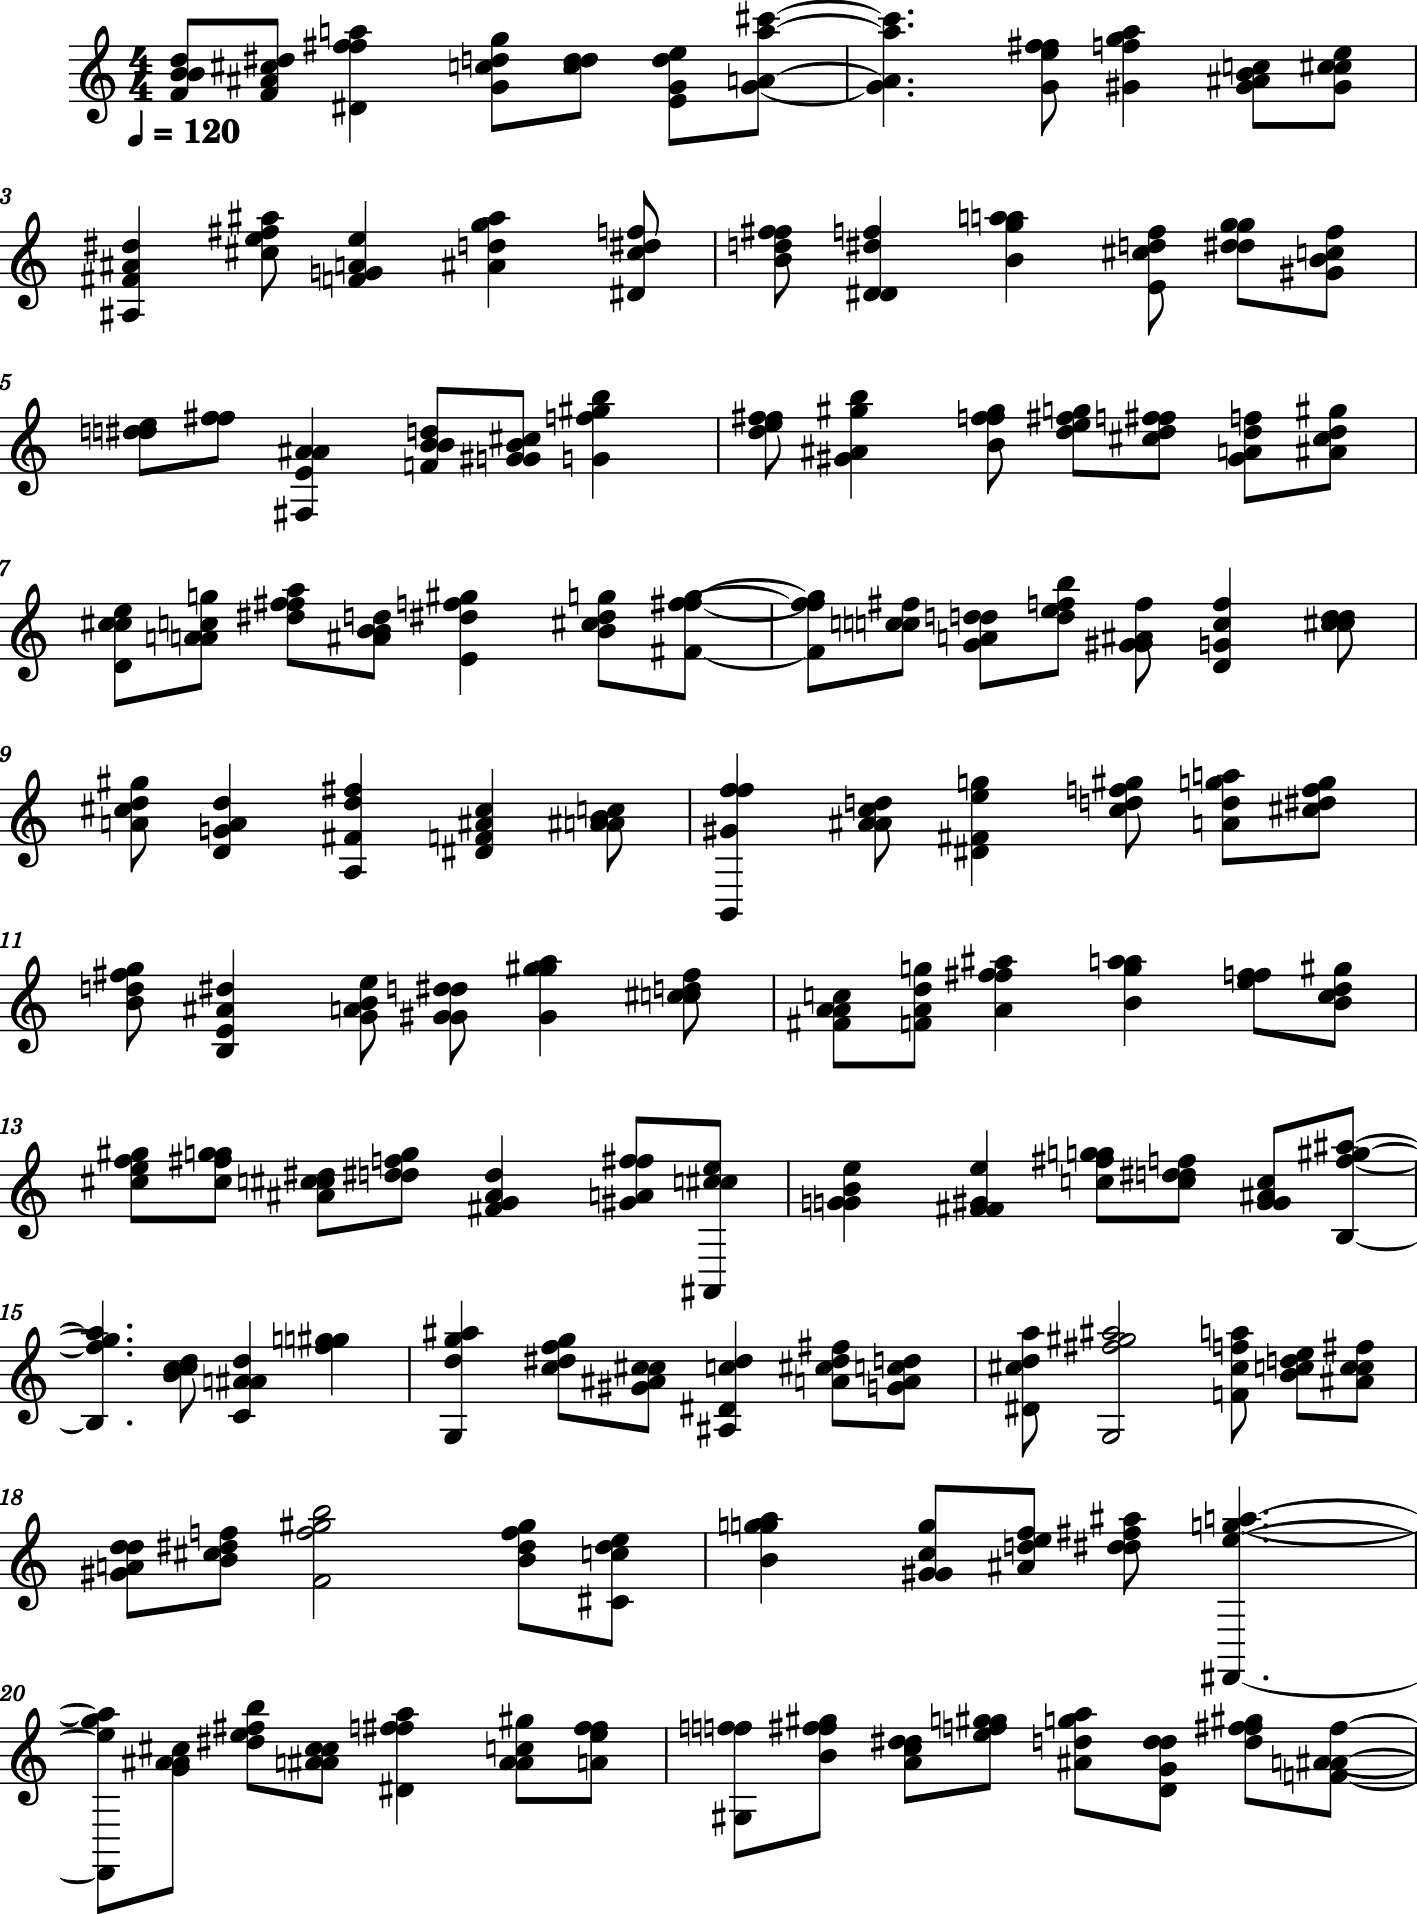

In [29]:
for k in range(dim):
    exec(f's.append(n{k})')
s.show()

In [30]:
s.show('midi')

In [31]:
s.show('musicxml')

In [32]:
chords

[['F4', 'B4', 'B4', 'D5'],
 ['F4', 'A#4', 'C#5', 'D#5'],
 ['F#5', 'F#5', 'A5', 'D#4'],
 ['D5', 'G4', 'C5', 'G5'],
 ['D5', 'D5', 'C5', 'D5'],
 ['D5', 'E4', 'G4', 'E5'],
 ['C#6', 'G4', 'A5', 'A4'],
 ['F#5', 'F#5', 'E5', 'G4'],
 ['F5', 'A5', 'G5', 'G#4'],
 ['B4', 'G#4', 'A#4', 'C5'],
 ['E5', 'G#4', 'C5', 'C#5'],
 ['A#3', 'D#5', 'F#4', 'A#4'],
 ['C#5', 'A#5', 'F#5', 'E5'],
 ['G4', 'F4', 'E5', 'A4'],
 ['G5', 'A#5', 'D5', 'A#4'],
 ['C#5', 'D#5', 'D#4', 'F5'],
 ['D5', 'F#5', 'B4', 'F5'],
 ['F5', 'D4', 'D#5', 'D#4'],
 ['A5', 'A5', 'G5', 'B4'],
 ['E4', 'C#5', 'F5', 'D5'],
 ['G5', 'D#5', 'G5', 'D5'],
 ['G#4', 'B4', 'C5', 'F5'],
 ['D5', 'D#5', 'D5', 'E5'],
 ['F#5', 'F#5', 'F5', 'F5'],
 ['F#3', 'E4', 'A#4', 'A#4'],
 ['F4', 'B4', 'B4', 'D5'],
 ['G#4', 'B4', 'C#5', 'G4'],
 ['F5', 'G#5', 'B5', 'G4'],
 ['F#5', 'E5', 'D5', 'F5'],
 ['G#5', 'B5', 'A#4', 'G#4'],
 ['F5', 'G#5', 'F5', 'B4'],
 ['G5', 'D5', 'F#5', 'E5'],
 ['C#5', 'F5', 'D5', 'F#5'],
 ['G#4', 'D5', 'A4', 'F5'],
 ['A#4', 'C#5', 'D5', 'G#5'],
 [

In [35]:
len(chords)

985

In [36]:
len(dur_notes)

985

In [34]:
dur_notes

array([ 4,  3,  6,  3,  0,  3,  9,  4,  5,  2,  1,  6,  4,  5,  5,  2,  1,
        5,  6,  3,  3,  3,  0,  2,  8,  4,  4,  8,  2,  8,  4,  2,  1,  3,
        3,  3,  3,  3,  3,  5,  2,  5,  1,  3,  3,  4,  6,  0,  3,  5,  6,
        5,  3,  6,  2,  5,  3,  4,  2,  2,  6,  4,  3,  7,  1,  4,  4,  5,
        5,  3,  3,  2,  4,  1,  1,  5,  3,  4,  5,  5,  3,  0,  3,  9,  0,
        5,  5,  8,  3,  2,  5,  2,  3,  4, 10,  4,  1,  2,  2,  1,  9,  2,
        3,  6,  4,  2,  4,  9,  4,  4,  2,  6,  4,  3,  4,  4,  1,  4,  4,
        4,  4,  5,  3,  5,  0,  0,  4,  0,  3,  4,  1,  3,  2,  6,  2,  3,
        3,  6,  8,  0,  3,  4,  6,  2,  2,  2,  4,  2,  2,  0,  6,  7, 13,
        3,  4,  4,  8,  3, 10,  0,  4,  7,  2,  1,  3,  5,  9,  7,  4,  2,
        2,  3,  6,  3,  1,  6,  3,  2,  2,  9,  5,  1,  2,  3,  2,  3,  1,
        6,  3,  5,  4,  6,  3,  3,  4,  1, 10,  4,  3,  2,  3,  2,  4,  3,
        6,  2,  2,  3,  1,  1,  4,  4,  4,  6,  1,  2,  3,  3,  5,  2,  3,
        4,  2,  8,  0,  8

In [37]:
np.save('spectra_chords', chords)

In [38]:
np.save('spectra_durations', dur_notes)